In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
import cv2
from glob import glob
from tqdm import tqdm

In [2]:
mask_paths = glob("../datasets/Satellite/ann_dir/train_0/*.png")
masks = [cv2.imread(mask, cv2.IMREAD_GRAYSCALE) for mask in tqdm(mask_paths)]
mask_data = np.array(masks)

100%|██████████| 5627/5627 [03:03<00:00, 30.67it/s]


100%|██████████| 5627/5627 [00:35<00:00, 160.18it/s]


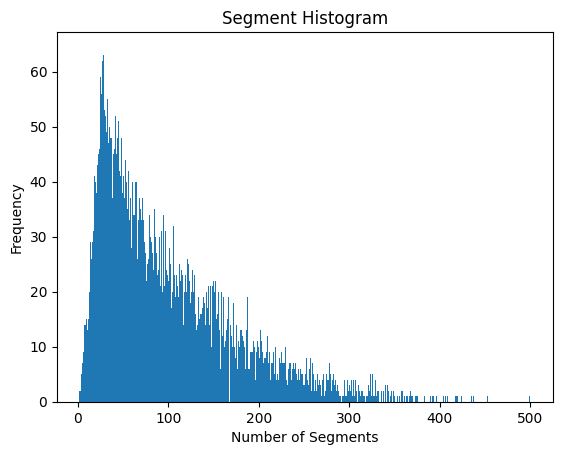

In [3]:

# Compute the number of segments in each image mask
num_segments = []
for mask in tqdm(mask_data):
    labeled_mask, num_labels = label(mask, structure=np.ones((3, 3)))
    num_segments.append(num_labels)

# Visualize the histogram of segment counts
plt.hist(num_segments, bins=max(num_segments) + 1)
plt.xlabel('Number of Segments')
plt.ylabel('Frequency')
plt.title('Segment Histogram')
plt.show()

In [4]:
len(num_segments)

5627

/home/jaehyunkang/anaconda3/envs/mmseg2/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


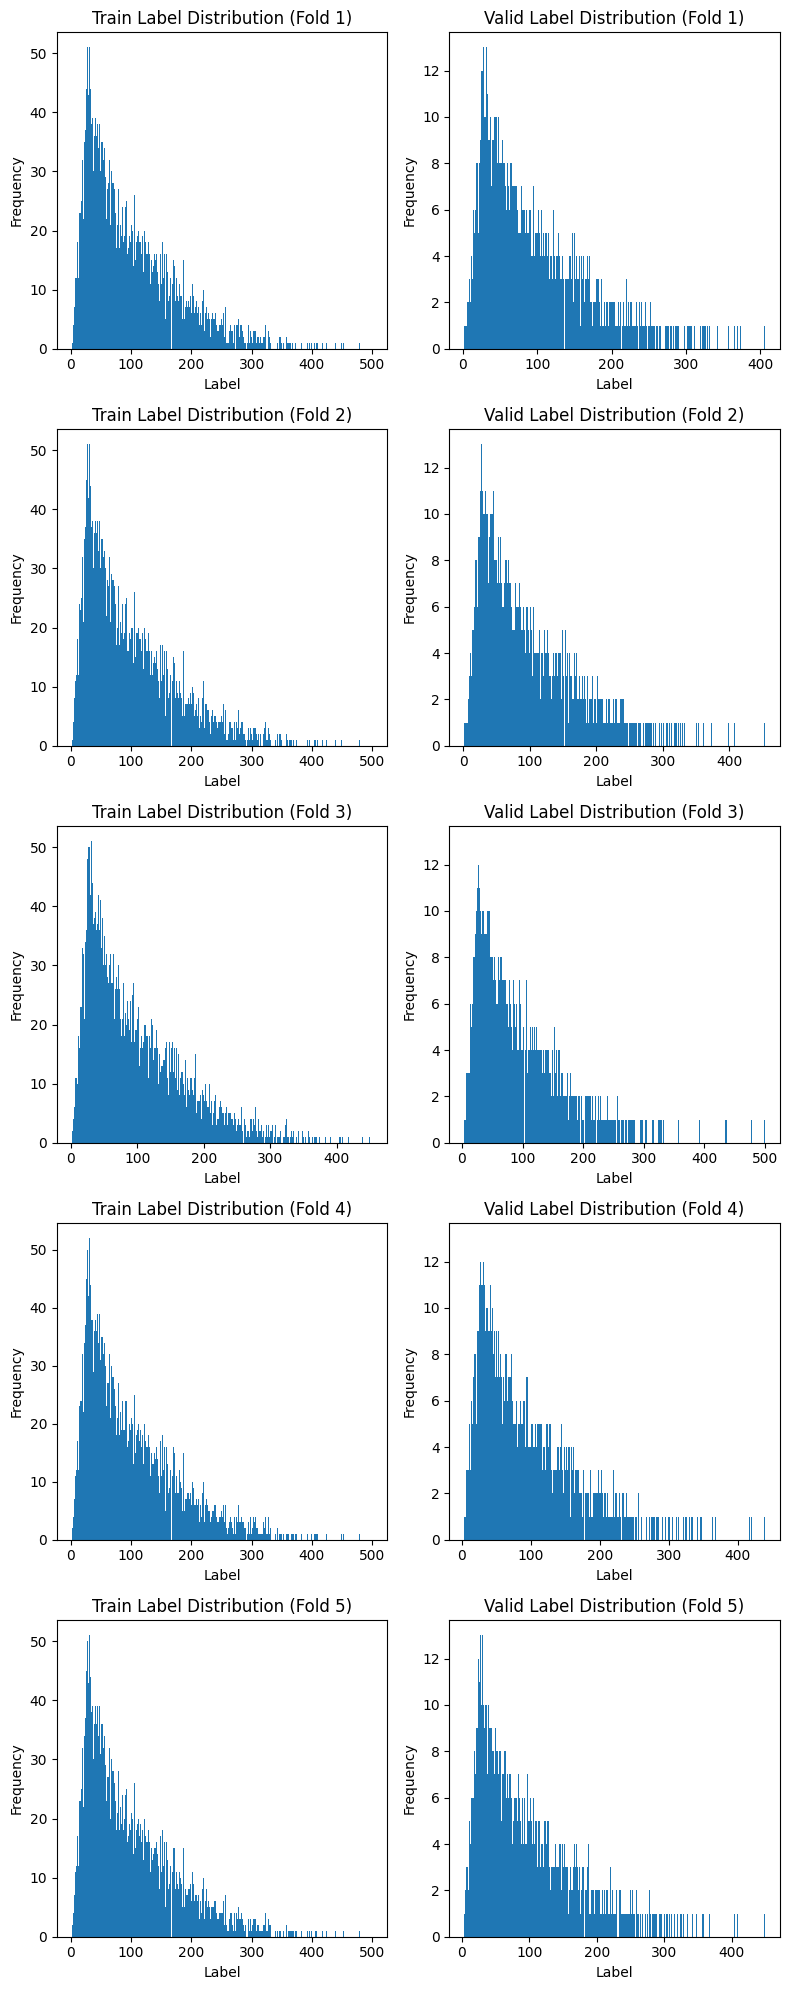

In [5]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_label_distributions = []
test_label_distributions = []

num_segments_np = np.array(num_segments)

# Split the data into folds
for train_index, test_index in kfold.split(list(range(0,len(num_segments))), num_segments_np):
    train_labels = num_segments_np[train_index]
    test_labels = num_segments_np[test_index]
    
    train_label_distributions.append(train_labels)
    test_label_distributions.append(test_labels)


num_folds = len(train_label_distributions)
fig, axs = plt.subplots(num_folds, 2, figsize=(8, num_folds * 4))

for i in range(num_folds):
    axs[i, 0].hist(train_label_distributions[i], bins=max(train_label_distributions[i]) + 1)
    axs[i, 0].set_xlabel('Label')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].set_title('Train Label Distribution (Fold {})'.format(i+1))
    
    axs[i, 1].hist(test_label_distributions[i], bins=max(test_label_distributions[i]) + 1)
    axs[i, 1].set_xlabel('Label')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_title('Valid Label Distribution (Fold {})'.format(i+1))

plt.tight_layout()
plt.show()